In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import librosa

In [2]:
FRAME_LENGTH = 1024
HOP_LENGTH = FRAME_LENGTH  // 2
FFT_LENGTH = FRAME_LENGTH

In [3]:
data, fs = librosa.load('./audio/aiueo.wav')

In [4]:
frames = librosa.util.frame(data, frame_length=FRAME_LENGTH,
                            hop_length=HOP_LENGTH).T

In [5]:
frames.shape

(211, 1024)

In [6]:
# ケプストラムの計算 (FFT → 絶対値 → 対数 → 逆FFT)
fft_spec = scipy.fft.rfft(frames)
log_amp_spec = np.log(np.abs(fft_spec))
cepstrum = scipy.fft.irfft(log_amp_spec)

In [7]:
cepstrum.shape

(211, 1024)

In [14]:
from modules.utils import get_framing_data

framing_data = get_framing_data(data, 1024, 0.5)
spec = np.fft.rfft(framing_data)
spec_db = np.log(np.abs(spec))
ceps_db = np.fft.irfft(spec_db)

In [15]:
ceps_db.shape

(211, 1024)

In [16]:
cepstrum = ceps_db

In [17]:
MAX_Fo = 200                # 分析における基本周波数の最大値 (Hz)
MIN_Fo = 60                 # 分析における基本周波数の最小値 (Hz)

# ケプストラムの最大次数、最小次数
max_cep_order = int(np.floor(fs / MIN_Fo))
min_cep_order = int(np.floor(fs / MAX_Fo))

# ピーク位置の検出
peak_index = np.argmax(cepstrum[:, min_cep_order:max_cep_order], axis=1)
max_quef = peak_index + min_cep_order

# # ピーク位置の検出
# peak_index = np.argmax(cepstrum, axis=1)
# max_quef = peak_index

# ケフレンシから変換して基本周波数の推定
fo = fs / max_quef

# 基本周波数の系列：無声音のフレームでは 0 Hzとするため 一様に0で初期化
fo_seq = np.zeros(frames.shape[0])

# 有声音のフレームに 推定された基本周波数を格納する
fo_seq = fo

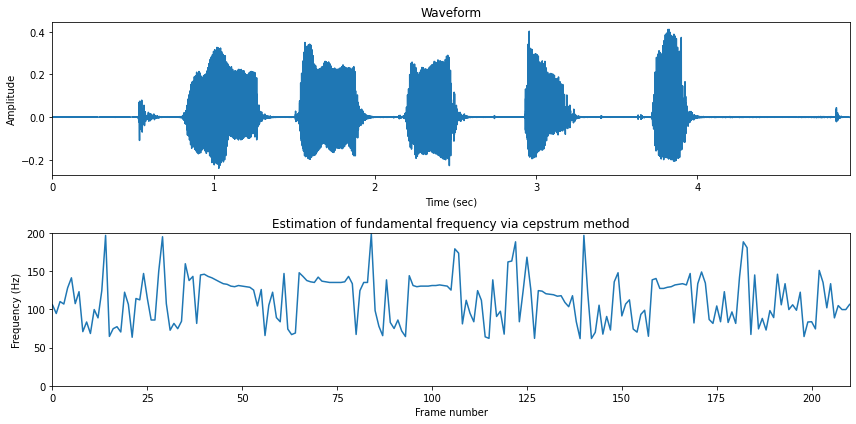

In [18]:
# 基本周波数の系列を表示
fig = plt.figure(figsize=(12, 6))
n_samples = len(data)
time = np.arange(n_samples) / fs
axes = fig.add_subplot(2, 1, 1)
axes.plot(time, data)
axes.set_xlabel("Time (sec)")
axes.set_ylabel("Amplitude")
axes.set_title("Waveform")
axes.set_xlim(0, np.max(time))

axes = fig.add_subplot(2, 1, 2)
axes.plot(fo_seq)
axes.set_xlabel("Frame number")
axes.set_ylabel("Frequency (Hz)")
axes.set_title("Estimation of fundamental frequency via cepstrum method")
axes.set_xlim(0, len(fo_seq) - 1)
axes.set_ylim(0, MAX_Fo)

plt.tight_layout()
plt.show()